# 3-3-ChIPAnnotationAnalysis
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. Coverage around TSS
    * 2.1 TSS site
    * 2.2 H3K27ac
    * 2.3 H3K4me1
* 3. Coverage around peaks
    * 3.1 Single peaks
        * 3.1.1 H3K27ac
        * 3.1.2 H3K4me1
    * 3.2 Cross-peaks
        * 3.2.1 H3K27ac around H3K4me1 peaks
        * 3.2.2 H3K4me1 around H3K27ac peaks
* 4. Consensus peaks and correlation
    * 4.1 Consensus peaks
    * 4.2 Correlation at TSS
    * 4.3 Correlation at peaks

## Files
* Input: X1-H3K27ac-meanlog2.bw, h3k4me1meanlog2.bw, k27ac_pooled_april21_summits.bed, k4me1_summits.bed
* Output: 
    * chip_summits_july21.bed
    * chip_summits_k27ac_july21.bed
    * k4me1corr_july21.csv
    * Fig 3-3-1 Heatmap of H3K27ac signal around TSS
    * Fig 3-3-2 Heatmap of H3K4me1 signal around TSS
    * Fig 3-3-3 H3K27ac signal at H3K27ac peaks
    * Fig 3-3-4 H3K4me1 signal at H3K4me1 peaks
    * Fig 3-3-5 H3K27ac signal at H3K4me1 peaks
    * Fig 3-3-6 H3K4me1 signal at H3K27ac peaks

# 1. Introduction

# 2. Coverage around TSS

## 2.1 TSS site

In [ ]:
import gffutils
db = gffutils.create_db('/hydra/sexual_genome_annotation_files/sexual_genome_annotation/smes_v2_hconf_SMESG.gff3', '/hydra/enhancer_regions/genome_hconf.db', force=True)

In [ ]:
db = gffutils.FeatureDB('/hydra/enhancer_regions/genome_hconf.db')

The TSS were extracted: 

In [ ]:
f = open("enhancer_regions/tss.bed", "a")
for gene in db.all_features(featuretype='gene'):
    if (gene.strand == "+"):
        f.write(gene[0]+"\t"+str(gene.start)+"\t"+str((gene.start+1))+"\n")
    if (gene.strand == "-"):
        f.write(gene[0]+"\t"+str(gene.end-1)+"\t"+str((gene.end))+"\n")

The TSS.bed file was inspected:

In [27]:
%%bash
cd /hydra/enhancer_regions
wc -l tss.bed

22192 tss.bed


## 2.2 H3K27ac

In [28]:
%%bash
cd /hydra/chip_neiro/k27ac
less k27acpeaks_profiletss.sh

#!/bin/bash

computeMatrix reference-point -S X1-H3K27ac-meanrep23log2.bw -R /hydra/enhancer_regions/tss.bed -a 2000 -b 2000 -o k27acpeakaroundtss_july21 --outFileNameMatrix k27acpeakaroundtss_july21.tab


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#nohup ./k27acpeaks_profiletss.sh

In [8]:
%%bash
cd /hydra/chip_neiro/k27ac
plotHeatmap -m k27acpeakaroundtss_july21 -o k27acpeakaroundtss_july21.png --samplesLabel "H3K27ac TSS" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold-change" --refPointLabel "Peak" -z " "

/home/ubuntu/anaconda3/lib/python3.8/site-packages/deeptools/heatmapper.py:1219: RuntimeWarning:

Mean of empty slice



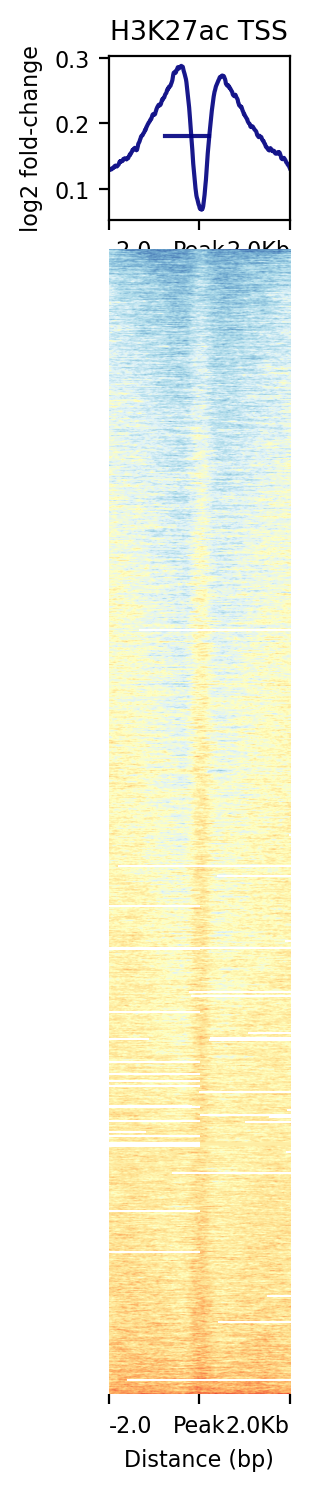

In [9]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/k27acpeakaroundtss_july21.png')

**Fig 3-3-1** *Heatmap of H3K27ac signal around TSS.*

## 2.3 H3K4me1

In [10]:
%%bash
cd /hydra/chip_neiro/k4me1
less k4me1peaks_profiletss.sh

#!/bin/bash

computeMatrix reference-point -S h3k4me1meanlog2.bw -R /hydra/enhancer_regions/tss.bed -a 2000 -b 2000 -o k4me1peakmatrixtss_july21 --outFileNameMatrix k4me1peaktss_july21.tab


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k4me1
#nohup ./k4me1peaks_profiletss.sh &

In [13]:
%%bash
cd /hydra/chip_neiro/k4me1
plotHeatmap -m k4me1peakmatrixtss_july21 -o k4me1peaktss_july21.png --samplesLabel "H3K4me1 TSS" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold-change" --refPointLabel "Peak" -z " "

/home/ubuntu/anaconda3/lib/python3.8/site-packages/deeptools/heatmapper.py:1219: RuntimeWarning:

Mean of empty slice



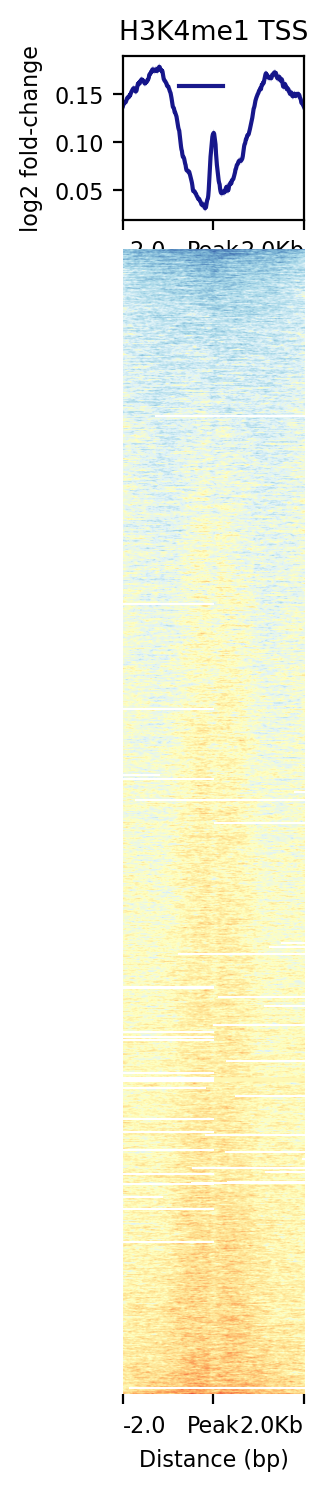

In [15]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k4me1/k4me1peaktss_july21.png')

**Fig 3-3-2** *Heatmap of H3K4me1 signal around TSS*

# 3. Coverage around peaks

## 3.1 Single peaks

### 3.1.1 H3K27ac

In [1]:
%%bash
cd /hydra/chip_neiro/k27ac
less k27acpeaks_profile.sh

#!/bin/bash

computeMatrix reference-point -S X1-H3K27ac-meanrep23log2.bw -R /hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed -a 1000 -b 1000 -o k27acpeakmatrix_july21 --outFileNameMatrix k27acpeak_july21.tab


In [1]:
%%bash
cd /hydra/chip_neiro/k27ac
wc -l k27ac_pooled_april21_summits.bed

37345 k27ac_pooled_april21_summits.bed


In [ ]:
#%%bash
#cd /hydra/chip_neiro/k27ac
#nohup ./k27acpeaks_profile.sh &

In [3]:
%%bash
cd /hydra/chip_neiro/k27ac
plotHeatmap -m k27acpeakmatrix_july21 -o k27acpeakmatrix_july21.png --samplesLabel "H3K27ac" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold-change" --refPointLabel "Peak" -z " "

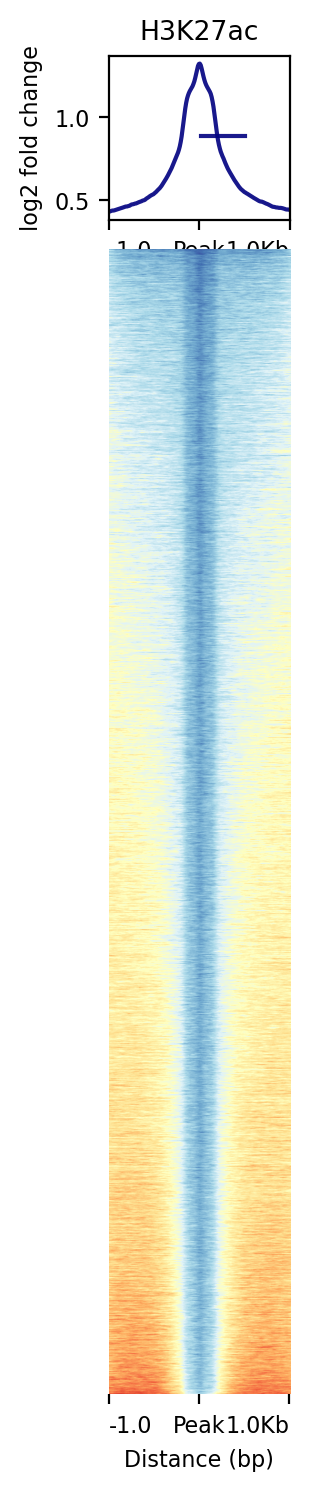

In [1]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/k27acpeakmatrix_july21.png')

**Fig 3-3-3** *H3K27ac signal at H3K27ac peaks*

### 3.1.2 H3K4me1

In [2]:
%%bash
cd /hydra/chip_neiro/k4me1
less k4me1peaks_profiles.sh

#!/bin/bash

computeMatrix reference-point -S h3k4me1meanlog2.bw -R /hydra/enhancer_regions/k4me1_summits.bed -a 1000 -b 1000 -o k4me1peakmatrix_july21 --outFileNameMatrix k4me1peak_july21.tab


In [2]:
%%bash
cd /hydra/enhancer_regions
wc -l k4me1_summits.bed

13868 k4me1_summits.bed


In [ ]:
#%%bash
#cd /hydra/chip_sexual_organised
#nohup ./k4me1peaks_profiles.sh &

In [3]:
%%bash
cd /hydra/chip_neiro/k4me1
plotHeatmap -m k4me1peakmatrix_july21 -o k4me1peakmatrix_july21.png --samplesLabel "H3K4me1" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold change" --refPointLabel "Peak" -z " "

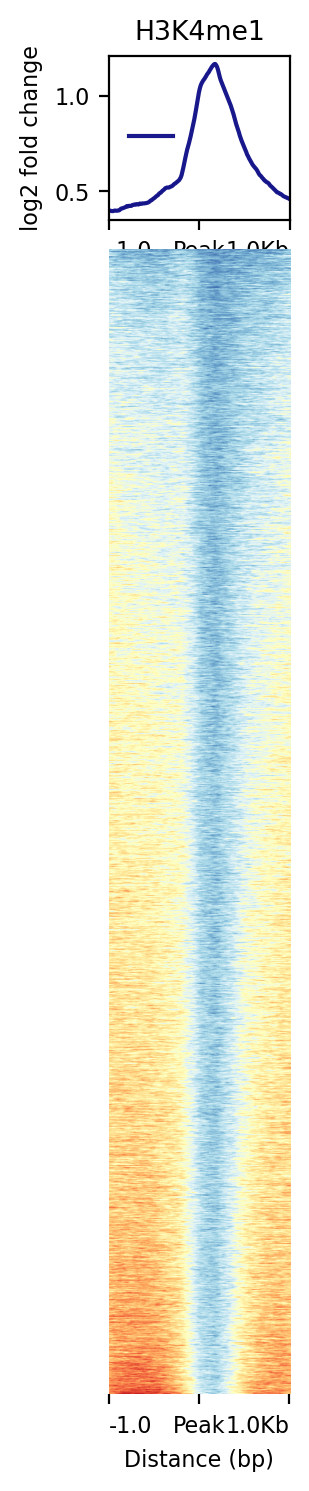

In [4]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k4me1/k4me1peakmatrix_july21.png')

**Fig 3-3-4** *H3K4me1 signal at H3K4me1 peaks* 

# 3.2 Cross-peaks

### 3.2.1 H3K27ac around H3K4me1 peaks

In [5]:
%%bash
cd /hydra/chip_neiro/k27ac
less k27acpeaks_profilek4me1.sh

#!/bin/bash

computeMatrix reference-point -S X1-H3K27ac-meanrep23log2.bw -R /hydra/enhancer_regions/k4me1_summits.bed -a 1000 -b 1000 -o k27acpeakaroundk4me1_july21 --outFileNameMatrix k27acpeakaroundk4me1_july21.tab


In [ ]:
#%%bash
#cd /hydra/chip_sexual_organised
#nohup ./k27acpeaks_profilek4me1.sh &

In [10]:
%%bash
cd /hydra/chip_neiro/k27ac
plotHeatmap -m k27acpeakaroundk4me1_july21 -o k27acpeakmatrixk4me1_july21.png --samplesLabel "H3K27ac at H3K4me1" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold change" --refPointLabel "Peak" -z " "

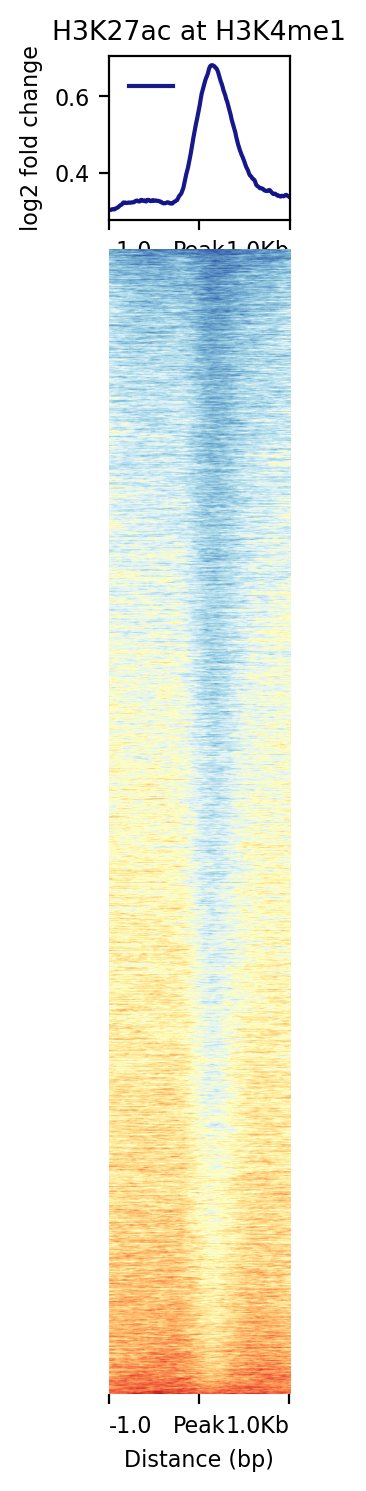

In [11]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k27ac/k27acpeakmatrixk4me1_july21.png')

**Fig 3-3-5** *H3K27ac signal at H3K4me1 peaks*

### 3.2.2 H3K4me1 around H3K27ac peaks

In [13]:
%%bash
cd /hydra/chip_neiro/k4me1
less k4me1peaks_profilek27ac.sh

#!/bin/bash

computeMatrix reference-point -S h3k4me1meanlog2.bw -R /hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed -a 1000 -b 1000 -o k4me1peakmatrixk27ac_july21 --outFileNameMatrix k4me1peakk27ac_july21.tab


In [ ]:
#%%bash
#cd /hydra/chip_sexual_organised
#nohup ./k4me1peaks_profilek27ac.sh &

In [14]:
%%bash
cd /hydra/chip_neiro/k4me1
plotHeatmap -m k4me1peakmatrixk27ac_july21 -o k4me1peakmatrixk27ac_july21.png --samplesLabel "H3K4me1 at H3K27ac" --boxAroundHeatmaps no --missingDataColor 1 --xAxisLabel "Distance (bp)" --plotType se --whatToShow "plot and heatmap" --heatmapHeight 17.5 --heatmapWidth 2.5 -y "log2 fold change" --refPointLabel "Peak" -z " "

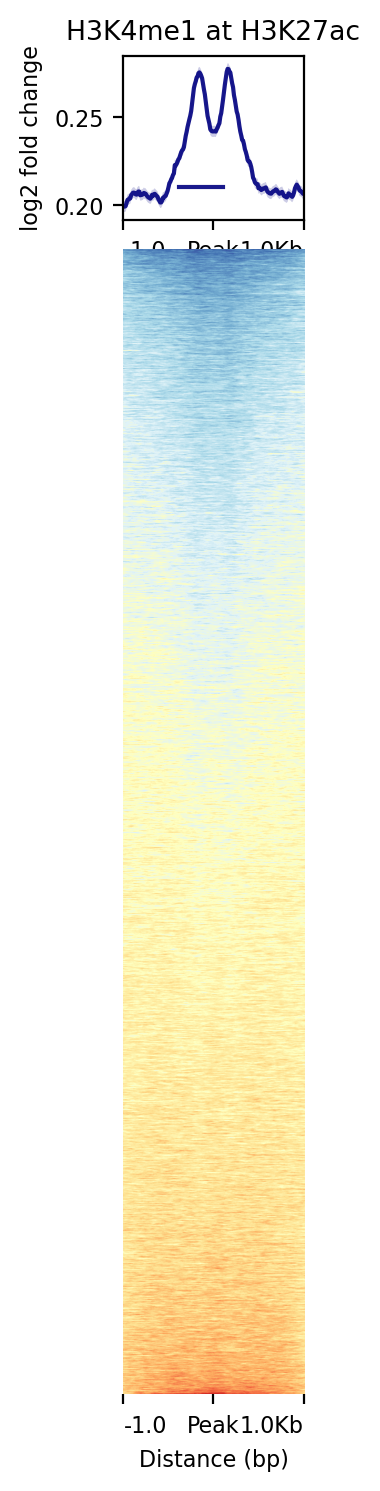

In [15]:
from IPython.display import Image
Image(filename='/hydra/chip_neiro/k4me1/k4me1peakmatrixk27ac_july21.png')

**Fig 3-3-6** *H3K4me1 signal at H3K27ac peaks*

# 4. Consensus peaks and correlation

## 4.1 Consensus peaks 

The consensus peaks were defined as H3K27ac peaks that were at most 500 bp from H3K4me1 peaks:

In [1]:
%%bash
cd /hydra/enhancer_regions
bedtools slop -i /hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed -g /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome -b 500 | bedtools intersect -a - -b k4me1_summits.bed > chip_summits_july21.bed

In [23]:
%%bash
cd /hydra/enhancer_regions
wc -l chip_summits_july21.bed
wc -l k4me1_summits.bed
cd /hydra/chip_neiro/k27ac/
wc -l k27ac_pooled_april21_summits.bed

5529 chip_summits_july21.bed
13868 k4me1_summits.bed
37345 k27ac_pooled_april21_summits.bed


In [5]:
%%bash
cd /hydra/enhancer_regions
head -2 chip_summits_july21.bed

dd_Smes_g4_1	780847	781226	k27ac_pooled_april21_peak_22	4.59145
dd_Smes_g4_1	863082	863552	k27ac_pooled_april21_peak_28	2.19864


In total 5529 consensus peaks were found.

All the other H3K27ac peaks that were lost due to overlap were also extracted: 

In [17]:
%%bash
cd /hydra/enhancer_regions
bedtools slop -i /hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed -g /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome -b 500 > k27ac1000bp_july21.bed
for value in {1..5529}; do head -$value chip_summits_july21.bed | tail -1 | bedtools intersect -a k27ac1000bp_july21.bed -b - >> chip_summits_k27ac_july21.bed; done

In [19]:
%%bash
cd /hydra/enhancer_regions
wc -l chip_summits_k27ac_july21.bed

7541 chip_summits_k27ac_july21.bed


All the H327ac peaks that were not included with the combined peaks were also extracted: 

In [4]:
import pandas as pd
k27ac_summits = pd.read_csv("/hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed", sep="\t", header=None)
chip_summits_k27ac = pd.read_csv("/hydra/enhancer_regions/chip_summits_k27ac_july21.bed", sep="\t", header=None)

In [6]:
k27ac_nonchip_peaks = []
for i in range(len(k27ac_summits)):
    if len(chip_summits_k27ac[chip_summits_k27ac.iloc[:,3] == k27ac_summits.iloc[i,3]]) == 0:
        k27ac_nonchip_peaks.append(k27ac_summits.iloc[i,3])

In [7]:
k27ac_nonchip = k27ac_summits.iloc[0:1,:]
for i in range(len(k27ac_nonchip_peaks)):
    row = k27ac_summits[k27ac_summits.iloc[:,3] == k27ac_nonchip_peaks[i]].iloc[0:1,:]
    k27ac_nonchip = pd.concat([k27ac_nonchip, row])
k27ac_nonchip =  k27ac_nonchip.iloc[1:,:]
k27ac_nonchip.to_csv("/hydra/enhancer_regions/k27ac_nonchip_july21.bed", sep="\t", index=False, header=None)

In [8]:
%%bash
cd /hydra/enhancer_regions
wc -l k27ac_nonchip_july21.bed

32340 k27ac_nonchip_july21.bed


All the other H3K4me1 peaks that were lost due to overlap were also extracted: 

In [1]:
%%bash
cd /hydra/enhancer_regions
bedtools slop -i k4me1_summits.bed -g /hydra/sexual_genome_annotation_files/sexual_genome_annotation/sizes.genome -b 500 > k4me11000bp_july21.bed
for value in {1..5529}; do head -$value chip_summits_july21.bed | tail -1 | bedtools intersect -a k4me11000bp_july21.bed -b - >> chip_summits_k4me1_july21.bed; done

In [2]:
%%bash
cd /hydra/enhancer_regions
wc -l chip_summits_k4me1_july21.bed

7095 chip_summits_k4me1_july21.bed


All the H3K4me1 peaks that were not included with the combined peaks were also extracted: 

In [9]:
import pandas as pd
k4me1_summits = pd.read_csv("/hydra/enhancer_regions/k4me1_summits.bed", sep="\t", header=None)
chip_summits_k4me1 = pd.read_csv("/hydra/enhancer_regions/chip_summits_k4me1_july21.bed", sep="\t", header=None)

In [12]:
k4me1_nonchip_peaks = []
for i in range(len(k4me1_summits)):
    if len(chip_summits_k4me1[chip_summits_k4me1.iloc[:,3] == k4me1_summits.iloc[i,3]]) == 0:
        k4me1_nonchip_peaks.append(k4me1_summits.iloc[i,3])

In [13]:
k4me1_nonchip = k4me1_summits.iloc[0:1,:]
for i in range(len(k4me1_nonchip_peaks)):
    row = k4me1_summits[k4me1_summits.iloc[:,3] == k4me1_nonchip_peaks[i]].iloc[0:1,:]
    k4me1_nonchip = pd.concat([k4me1_nonchip, row])
k4me1_nonchip =  k4me1_nonchip.iloc[1:,:]
k4me1_nonchip.to_csv("/hydra/enhancer_regions/k4me1_nonchip_july21.bed", sep="\t", index=False, header=None)

In [14]:
%%bash
cd /hydra/enhancer_regions
wc -l k4me1_nonchip_july21.bed

9103 k4me1_nonchip_july21.bed


## 4.2 Correlation at TSS

In [1]:
import pandas as pd
k27ac_tss = pd.read_csv("/drives/raid/AboobakerLab/jakke/chip_neiro/k27ac/k27acpeakaroundtss_july21.tab", sep="\t", header=None, skiprows=3)
k4me1_tss = pd.read_csv("/drives/raid/AboobakerLab/jakke/chip_neiro/k4me1/k4me1peaktss_july21.tab", sep="\t", header=None, skiprows=3)
tss = pd.read_csv("/drives/raid/AboobakerLab/jakke/enhancer_regions/tss.bed", sep="\t", header=None)

In [3]:
2000/400

5.0

In [18]:
k4me1_tss_mean = k4me1_tss.mean(axis=1)
k27ac_tss_mean = k27ac_tss.mean(axis=1)

In [19]:
tss_chipcorr = pd.DataFrame({"Contig": tss.iloc[:,0], "Start": tss.iloc[:,1], "Stop": tss.iloc[:,2], "k4me1": k4me1_tss_mean, "k27ac": k27ac_tss_mean})

In [20]:
tss_chipcorr.to_csv("/hydra/chip_neiro/tsscorr_july21.csv", index=False)

## 4.3 Correlation at peaks

The H3K27 peaks, H3K4me1 peaks and consensus peaks were imported: 

In [22]:
import pandas as pd
k27ac_summits = pd.read_csv("/hydra/chip_neiro/k27ac/k27ac_pooled_april21_summits.bed", sep="\t", header=None)
k4me1_summits = pd.read_csv("/hydra/enhancer_regions/k4me1_summits.bed", sep="\t", header=None)
chip_summits = pd.read_csv("/hydra/enhancer_regions/chip_summits_july21.bed", sep="\t", header=None)

The H3K27ac signal at H3K27ac peaks was imported (+/- 1000bp):

In [23]:
import pandas as pd
k27ac_peaks = pd.read_csv("/hydra/chip_neiro/k27ac/k27acpeak_july21.tab", sep="\t", skiprows=3, header=None)

The H3K4me1 signal at H3K4me1 peaks was imported (+/- 1000bp): 

In [24]:
import pandas as pd
k4me1_peaks = pd.read_csv("/hydra/chip_neiro/k4me1/k4me1peak_july21.tab", sep="\t", skiprows=3, header=None)

The H3K27ac signal at H3K4me1 peaks was imported (+/- 1000bp):

In [25]:
import pandas as pd
k27ac_atk4me1 = pd.read_csv("/hydra/chip_neiro/k27ac/k27acpeakaroundk4me1_july21.tab", sep="\t", skiprows=3, header=None)

The H3K4me1 signal at H3K27ac peaks was imported (+/- 1000bp):

In [26]:
import pandas as pd
k4me1_atk27ac = pd.read_csv("/hydra/chip_neiro/k4me1/k4me1peakk27ac_july21.tab", sep="\t", skiprows=3, header=None)

The H3K27ac and H3K4me1 signals at peaks were concatenated:

In [27]:
k27ac_allpeaks = pd.concat([k27ac_peaks, k27ac_atk4me1])
k4me1_allpeaks = pd.concat([k4me1_atk27ac, k4me1_peaks])

The mean were taken over each position +/- 1000bp from the peak centre.

In [28]:
k4me1_peaks_mean = k4me1_allpeaks.mean(axis=1)
k27ac_peaks_mean = k27ac_allpeaks.mean(axis=1)

The H3K27ac peaks that were not selected as consensus peaks were improted:

In [29]:
import pandas as pd
chip_summits_k27ac = pd.read_csv("/hydra/enhancer_regions/chip_summits_k27ac_july21.bed", sep="\t", header=None)

In [30]:
peaks = pd.concat([k27ac_summits, k4me1_summits])

A correlation table was generated with peak names, H3K27ac signal, and H3K4me1 signal. 

In [31]:
k4me1corr = pd.DataFrame({"peaks": peaks.iloc[:,3], "k4me1": k4me1_peaks_mean, "k27ac": k27ac_peaks_mean})

In [33]:
k4me1corr["Enhancer"] = "a"
for i in range(len(k4me1corr)):
    peak_name = k4me1corr.iloc[i,0]
    if (sum(chip_summits.iloc[:,3] == peak_name) > 0) | (sum(chip_summits_k27ac.iloc[:,3] == peak_name) > 0):
        k4me1corr.iloc[i,3] = "b"
k4me1corr.to_csv("/hydra/chip_neiro/k4me1corr_july21.csv", index=False)

# FINNISHED